In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('fake_job_postings.csv')

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [7]:
round(100*(df.isnull().sum()/len(df.index)),2)

job_id                  0.00
title                   0.00
location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.07
benefits               40.32
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.41
required_experience    39.43
required_education     45.33
industry               27.42
function               36.10
fraudulent              0.00
dtype: float64

In [8]:
df = df.drop('salary_range',axis=1)

In [9]:
df['department'].value_counts()

Sales                        551
Engineering                  487
Marketing                    401
Operations                   270
IT                           225
                            ... 
Cocolife Asset Management      1
legal                          1
Processing Companies           1
Sale                           1
MAINT                          1
Name: department, Length: 1337, dtype: int64

In [10]:
df['department'] = df['department'].fillna(value='other')
df['department'].head()

0    Marketing
1      Success
2        other
3        Sales
4        other
Name: department, dtype: object

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

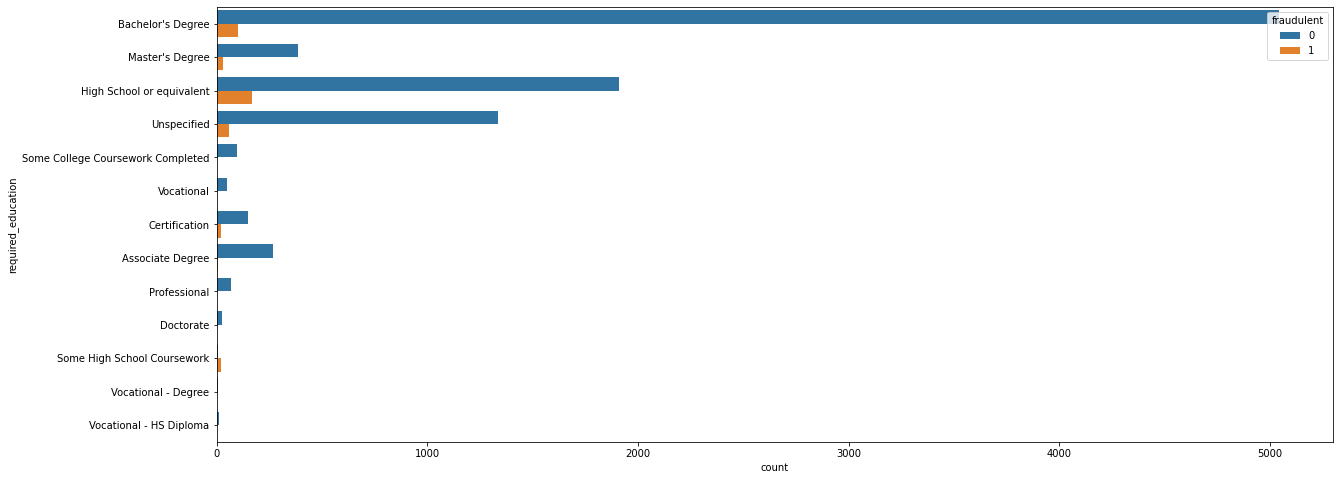

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(hue='fraudulent',y='required_education',data=df)
plt.savefig('plot1.jpeg')
plt.show()

In [14]:
df['required_education'].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [15]:
df['required_education'] = df['required_education'].fillna(value='other')

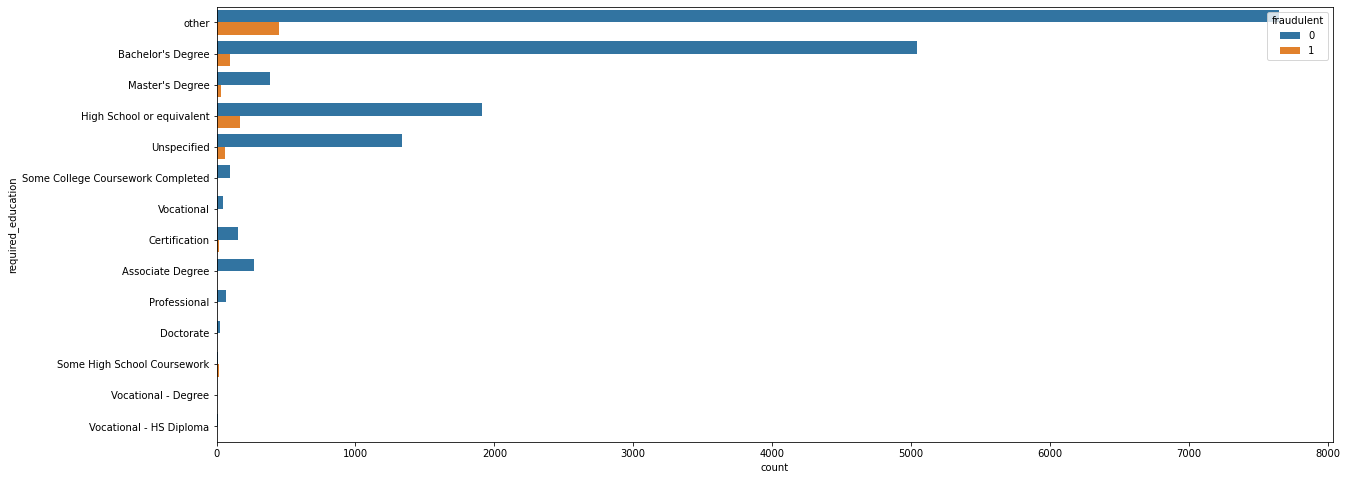

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(hue='fraudulent',y='required_education',data=df)
plt.show()

In [17]:
df['has_company_logo'].value_counts()

1    14220
0     3660
Name: has_company_logo, dtype: int64

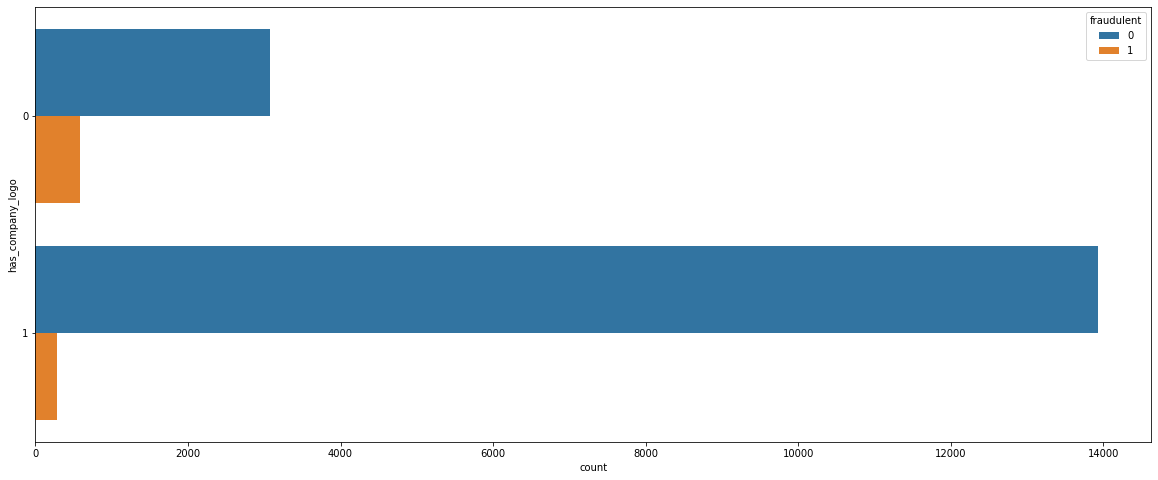

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(hue='fraudulent',y='has_company_logo',data=df)
plt.show()

In [19]:
df_f = df.loc[df['fraudulent']==0]

In [20]:
df_f.isnull().sum()

job_id                    0
title                     0
location                327
department                0
company_profile        2721
description               0
requirements           2541
benefits               6846
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3230
required_experience    6615
required_education        0
industry               4628
function               6118
fraudulent                0
dtype: int64

In [21]:
df_f = df_f.dropna()

In [22]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150).generate(' '.join
                                                                                           (df_f['benefits']))

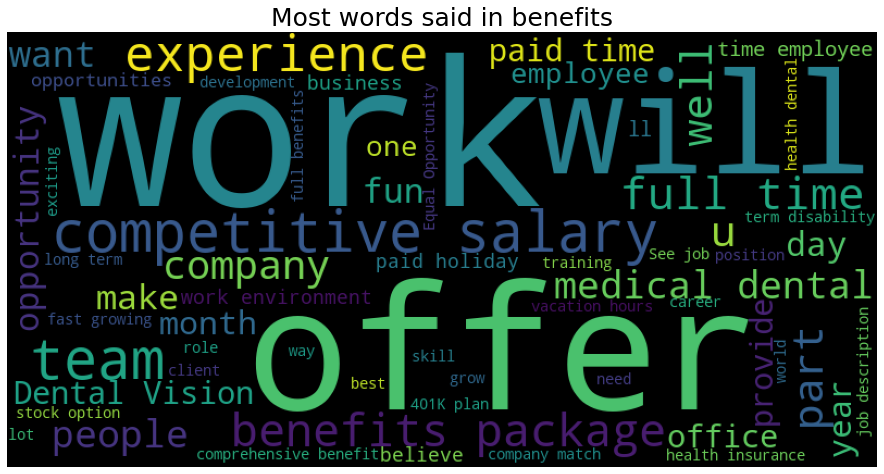

In [23]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most words said in benefits", fontsize=25)
plt.savefig('cloud.jpeg')
plt.show()

In [24]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150).generate(' '.join
                                                                                           (df_f['description']))

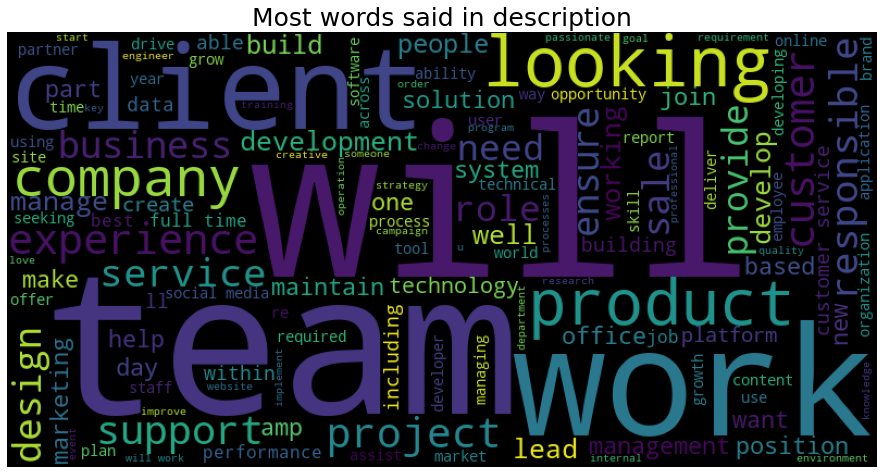

In [25]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most words said in description", fontsize=25)
plt.savefig('cloud1.jpeg')
plt.show()

In [26]:
df = df.dropna()
df = df.drop('job_id',axis=1)

In [27]:
cat_var = ['title','location','department','company_profile','employment_type','required_experience','required_education','industry',
          'function']

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cat_var] = df[cat_var].apply(lambda x: le.fit_transform(x))

In [29]:
df_copy = df.copy()

In [30]:
df = df.drop(['company_profile','description','benefits','requirements'],axis=1)

In [31]:
Model_Score = []
Model_Name = []
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score ,precision_score,f1_score,roc_auc_score
X = df.drop('fraudulent',axis=1)
y = df['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
knn_pred = KNN_Classifier.predict(X_test)
print("-----------------------------------------K Nearest Neighbour Classifier--------------------------------------")
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

-----------------------------------------K Nearest Neighbour Classifier--------------------------------------
[[1502   10]
 [  42   16]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1512
           1       0.62      0.28      0.38        58

    accuracy                           0.97      1570
   macro avg       0.79      0.63      0.68      1570
weighted avg       0.96      0.97      0.96      1570

0.9668789808917198


In [34]:
Model_Name.append('KNN Classifier')
Model_Score.append((accuracy_score(y_test, knn_pred)))

In [35]:
from sklearn.linear_model import LogisticRegression

LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train)

C:\Users\a\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [36]:
lgr_pred = LGR_Classifier.predict(X_test)
print("-----------------------------------------Logistic Regression--------------------------------------")
print(confusion_matrix(y_test,lgr_pred))
print(classification_report(y_test,lgr_pred))
print(accuracy_score(y_test,lgr_pred))

-----------------------------------------Logistic Regression--------------------------------------
[[1506    6]
 [  58    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1512
           1       0.00      0.00      0.00        58

    accuracy                           0.96      1570
   macro avg       0.48      0.50      0.49      1570
weighted avg       0.93      0.96      0.94      1570

0.9592356687898089


In [37]:
Model_Name.append('Logistic Regression')
Model_Score.append((accuracy_score(y_test, lgr_pred)))

In [38]:
from sklearn import tree
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy')
DTC_Classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
dtc_pred = DTC_Classifier.predict(X_test)
print("-----------------------------------------Decision Tree Classification--------------------------------------")
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))
print(accuracy_score(y_test,dtc_pred))

-----------------------------------------Decision Tree Classification--------------------------------------
[[1489   23]
 [  21   37]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1512
           1       0.62      0.64      0.63        58

    accuracy                           0.97      1570
   macro avg       0.80      0.81      0.81      1570
weighted avg       0.97      0.97      0.97      1570

0.9719745222929936


In [40]:
Model_Name.append('Decision Tree Classifier')
Model_Score.append((accuracy_score(y_test, dtc_pred)))

In [41]:
from sklearn.naive_bayes import BernoulliNB

BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)


BernoulliNB()

In [42]:
bnb_pred = BNB_Classifier.predict(X_test)
print("-----------------------------------------Naive Bayes Classification--------------------------------------")
print(confusion_matrix(y_test,bnb_pred))
print(classification_report(y_test,bnb_pred))
print(accuracy_score(y_test,bnb_pred))

-----------------------------------------Naive Bayes Classification--------------------------------------
[[1512    0]
 [  58    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1512
           1       0.00      0.00      0.00        58

    accuracy                           0.96      1570
   macro avg       0.48      0.50      0.49      1570
weighted avg       0.93      0.96      0.94      1570

0.9630573248407643


C:\Users\a\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
Model_Name.append('Naive Bayes Classification')
Model_Score.append((accuracy_score(y_test, bnb_pred)))

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
rfc_pred = rfc.predict(X_test)
print("-----------------------------------------Random Forest Classifier--------------------------------------")
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred))

-----------------------------------------Random Forest Classifier--------------------------------------
[[1512    0]
 [  24   34]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1512
           1       1.00      0.59      0.74        58

    accuracy                           0.98      1570
   macro avg       0.99      0.79      0.87      1570
weighted avg       0.98      0.98      0.98      1570

0.9847133757961783


In [46]:
Model_Name.append('Random Forest Classifier')
Model_Score.append((accuracy_score(y_test, rfc_pred)))

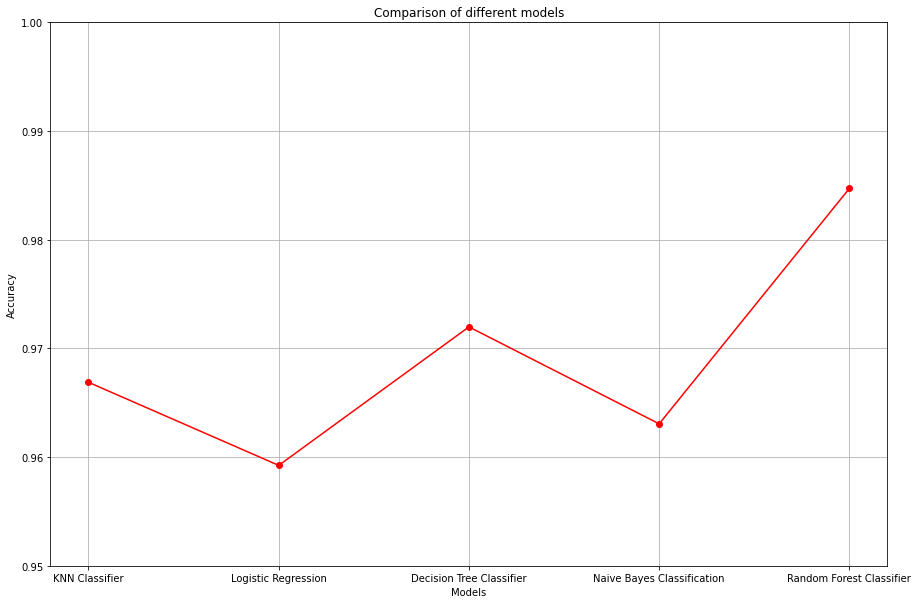

In [47]:
plt.figure(figsize = (15, 10))
plt.plot(Model_Name,Model_Score, marker = 'o', color = 'red')
plt.title('Comparison of different models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1.0)
plt.grid()
plt.savefig('Model_compare1.jpeg')
plt.show()